# Association Rules Analysis

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df=pd.read_csv("GroceryStoreDataSet.csv",encoding='utf-8',header=None)

In [3]:
df=df[0].str.split(',', expand=True)
df.columns=["0","1","2","3"];df

,0,1,2,3
0,MILK,BREAD,BISCUIT,None
1,BREAD,MILK,BISCUIT,CORNFLAKES
2,BREAD,TEA,BOURNVITA,None
3,JAM,MAGGI,BREAD,MILK
4,MAGGI,TEA,BISCUIT,None
5,BREAD,TEA,BOURNVITA,None
6,MAGGI,TEA,CORNFLAKES,None
7,MAGGI,BREAD,TEA,BISCUIT
8,JAM,MAGGI,BREAD,TEA
9,BREAD,MILK,None,None


In [4]:
items_0 = df['0'].unique()
items_1 = df['1'].unique()
items_2 = df['2'].unique()
items_3 = df['2'].unique()

In [5]:
items=set(list(items_0)+list(items_1)+list(items_2)+list(items_3))
items=list(items)
items.remove(None)

In [6]:
# one-hot encoding dönüşümü el ile. Sadece teori için
encoded_vals = []
for index, row in df.iterrows(): 
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [7]:
ohe_df = pd.DataFrame(encoded_vals) 

In [8]:
ohe_df.head()

,COCK,SUGER,MAGGI,BOURNVITA,COFFEE,JAM,CORNFLAKES,TEA,BREAD,BISCUIT,MILK
0,0,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,1,0,1,1,1
2,0,0,0,1,0,0,0,1,1,0,0
3,0,0,1,0,0,1,0,0,1,0,1
4,0,0,1,0,0,0,0,1,0,1,0


# Apriori Algorithm in Market Basket Analysis

**Apriori Algorithm uses the concept of Support, Confidence and Lift where,

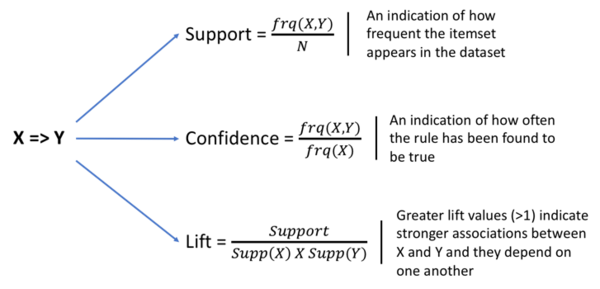

*https://wiki.smu.edu.sg/1718t3isss608/img_auth.php/thumb/b/b3/Lift_Confidence_Support.png/600px-Lift_Confidence_Support.png

- **The steps of working of the apriori algorithm can be given as:-**

    - Define the minimum support and confidence for the association rule
    - Take all the subsets in the transactions with higher support than the minimum support
    - Take all the rules of these subsets with higher confidence than minimum confidence
    - Sort the association rules in the decreasing order of lift. 


*https://analyticsindiamag.com/hands-on-guide-to-market-basket-analysis-with-python-codes/

In [9]:
freq_items = apriori(ohe_df, min_support = 0.2, use_colnames = True, verbose = 1)

Processing 51 combinations | Sampling itemset size 3


In [10]:
#freq_items=freq_items.sort_values("support", ascending = False);freq_items

In [11]:
association_rules_df=association_rules(freq_items, metric="confidence", min_threshold = 0.6)
association_rules_df.sort_values(by="lift", ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25
0,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
3,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
4,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05


### CORNFLAKES -> COFFEE

- "CORNFLAKES" and "COFFEE" products are seen together in 20% of all shopping.
- It was seen that 66% of customers who bought "CORNFLAKES" also bought "COFFEE". 
- Sales of "COFFEE" products increase by 1.67 times in purchases with "CORNFLAKES" products. 

### MAGGI -> TEA

- "MAGGI" and "TEA" products are seen together in 20% of all shopping.
- It was seen that 66% of customers who bought "MAGGI" also bought "TEA". 
- Sales of "TEA" products increase by 2.28 times in purchases with "MAGGI" products.

### SUGER -> COFFEE

- "SUGER" and "COFFEE" products are seen together in 20% of all shopping.
- It was seen that 80% of customers who bought "SUGER" also bought "COFFEE". 
- Sales of "COFFEE" products increase by 1.67 times in purchases with "SUGER" products.


## SUGGESTIONS
- Both products can be placed on the same shelf so that buyers of one item would be prompted to buy the other.
- Promotional discounts could be applied to just one out of the two products.
- Ads for one product can target buyers who buy the other product.
- Two products can be combined into a new bundle product.